In [4]:
import librosa
import matplotlib.pyplot as plt
import noisereduce as nr
import soundfile as sf
from scipy import signal, fft
import numpy as np
import pywt
from scipy.signal import savgol_filter
import os
from IPython.display import Audio

In [5]:
audio, sr = sf.read('../data/gopro-clipped/30kmph_short.wav')

In [27]:
audio, sr = sf.read('../data/gopro-clipped/30kmph_short.wav')
wavelet = 'db33'
coeffs = pywt.wavedec(audio, wavelet)
# print(coeffs)
print(len(coeffs))
print(len(coeffs[1]))
print(coeffs[1])
print(type(coeffs))
print(type([]))
[len(coeffs[i]) for i in range(len(coeffs))]

15
143
[-1.19394777e-02  2.57546245e-03  1.52859147e-02 -4.85924086e-02
  8.06607201e-02 -9.27930997e-02  5.32011445e-02 -6.43337192e-02
 -1.51216859e-02 -3.08212779e-03  3.98940939e-03  1.02250648e-01
 -2.01510843e-02  6.57702341e-02 -8.48432050e-02  3.35725644e-02
 -3.91803088e-02  3.33341533e-02  3.29532780e-02  1.32570547e-02
  3.58612627e-02 -4.74652785e-02  5.79882675e-02 -5.49198120e-02
  3.74685071e-02 -1.02792388e-01 -3.54821576e-02 -7.12173761e-03
  2.23658236e-01  6.10345696e-01  7.36519652e-01  9.84245904e-02
 -3.03732302e+00 -4.67086265e+00 -3.17400281e+00 -5.04902022e+00
 -1.54591196e+00 -4.46036891e+00  9.91220912e+00 -1.81031239e+00
 -3.25501900e+00 -1.14454676e-01  3.25435447e+00  2.69316910e-01
  5.16194410e+00 -6.93572891e+00  9.67062686e+00 -1.62422986e-01
 -9.67486328e+00  8.88435717e-01 -1.26761885e+01  2.83277477e+00
 -1.99894713e+00 -5.84853518e+00  6.84539285e-01 -7.39671267e+00
 -4.36598416e-01 -4.69112872e+00  8.18549994e+00 -1.15968200e+00
 -4.86524717e+00  

[143,
 143,
 222,
 379,
 694,
 1324,
 2584,
 5104,
 10144,
 20224,
 40384,
 80704,
 161343,
 322622,
 645179]

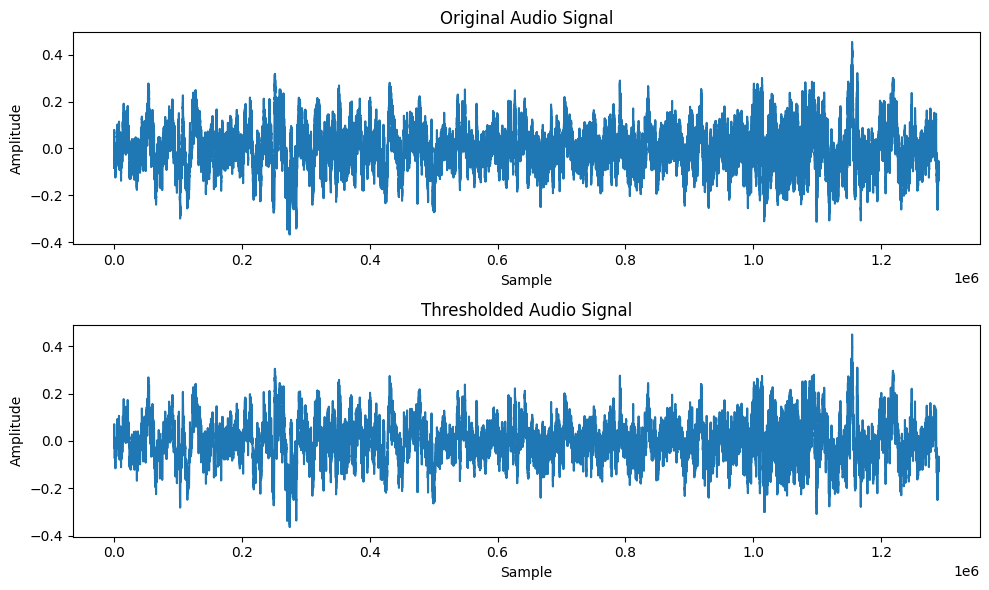

In [32]:
tc = [pywt.threshold(c, 0.1, mode='hard') for c in coeffs]
tcr = pywt.waverec(tc, wavelet)

# Plot original and thresholded audio signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(audio)
plt.title('Original Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(tcr)
plt.title('Thresholded Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [33]:
Audio(data=tcr, rate=sr)

In [22]:
audio_long, sr = sf.read('../data/gopro-clipped/10kmph_v1.wav')
coeffs = pywt.wavedec(audio_long, 'db13')
# print(coeffs)
print(len(coeffs))
print(len(coeffs[1]))
print(coeffs[1])
print(type(coeffs))
print(type([]))
[len(coeffs[i]) for i in range(len(coeffs))]

20
62
[-1.80968777e+00  6.05643760e-01  2.57373022e+00 -1.08734397e+00
 -4.41011683e-01  6.92025249e-01  2.33390948e+00 -1.05496791e+00
 -1.45518376e+00 -9.86077352e-01 -4.96317719e+00 -1.24691645e+01
  6.68884073e+00 -4.70338014e-01 -2.14351311e-01 -4.66000023e-01
  7.55310521e-01 -6.19096701e-01  2.28547082e-01 -1.05418231e-01
  2.18283484e-02 -1.62084381e-02  1.73711848e-02 -1.79487599e-03
  1.92040950e-02  1.04055850e-01  2.10557869e-01 -2.62698907e-02
  1.67136633e-01 -3.34898595e-02  5.61958333e-01  4.89844864e-01
  3.40720631e-01 -9.93884700e-02  6.56755638e-01 -1.68950009e-01
 -3.49960636e-02 -4.01063573e-02  6.62816705e-02  4.48995496e-02
  8.53449249e-02 -3.54720130e-02 -2.09960484e-01 -1.64301115e-01
  9.18752435e-02  5.47806881e-02  1.51195759e-02  1.78923931e-01
  7.70828755e-01  1.35662704e+00 -1.59382318e+00  4.19495379e-01
  1.28544504e+00 -2.85129440e+00  8.17166916e-01 -6.60862434e-01
  3.71957583e-01 -2.78362377e-01  1.18320099e-01  2.39981504e-01
  8.45608322e-02 -5

[62,
 62,
 100,
 176,
 328,
 632,
 1239,
 2453,
 4881,
 9737,
 19450,
 38876,
 77728,
 155432,
 310840,
 621655,
 1243285,
 2486545,
 4973065,
 9946105]

In [20]:
[(i*i*i)/1000000 for i in range(0,16)]

[0.0,
 1e-06,
 8e-06,
 2.7e-05,
 6.4e-05,
 0.000125,
 0.000216,
 0.000343,
 0.000512,
 0.000729,
 0.001,
 0.001331,
 0.001728,
 0.002197,
 0.002744,
 0.003375]